In [1]:
# import the libraries
import pandas as pd
import numpy as np
from numpy import linalg as LA
from scipy.io.arff import loadarff
from matplotlib import pyplot as plt

### Preprocessing Air Quality Dataset

In [2]:
# load the data. The function read_csv read excel files and it can also read
# files with missing data, representing the data points as NaNs. This 
# information is important for data preprocessing. The data used here 
# has some missing values. Need to find those 'missing data samples'.
Air_Quality = pd.read_excel('AirQualityUCI.xlsx')

# show the first 10 rows of data frame
Air_Quality.head(10)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
5,2004-03-10,23:00:00,1.2,1197.00,38,4.741012,750.25,89.0,1336.50,96.0,1393.00,949.25,11.175,59.175000,0.784772
6,2004-03-11,00:00:00,1.2,1185.00,31,3.624399,689.50,62.0,1461.75,77.0,1332.75,732.50,11.325,56.775000,0.760312
7,2004-03-11,01:00:00,1.0,1136.25,31,3.326677,672.00,62.0,1453.25,76.0,1332.75,729.50,10.675,60.000000,0.770238
8,2004-03-11,02:00:00,0.9,1094.00,24,2.339416,608.50,45.0,1579.00,60.0,1276.00,619.50,10.650,59.674999,0.764819
9,2004-03-11,03:00:00,0.6,1009.75,19,1.696658,560.75,-200.0,1705.00,-200.0,1234.75,501.25,10.250,60.200001,0.751657


**Discussion** about preprocessing this data. The columns 'Date' and 'Time' are not used, therefore discarded. The missing values in this data are marked '-200'. There are a few approaches: first, the missing values could take the mean along the axis, here the axis should be the column. Second, the missing values might take the median along the column or third, the most frequent. Since the data's type is numerical, the mean and median can be used. Here mean approach is utilized.

In [3]:
# Delete columns 'Date' and 'Time'
Air_Quality.drop(columns = ['Date', 'Time'], inplace = True)

# Count how many missing values does this data have
print("Column    Number of Missing Values")
      
for i in range(len(Air_Quality.columns)):
    count = (Air_Quality[Air_Quality.columns[i]]==-200).value_counts()[1]
    print("{}         {}".format(i+1,count))

Column    Number of Missing Values
1         1683
2         366
3         8443
4         366
5         366
6         1639
7         366
8         1642
9         366
10         366
11         366
12         366
13         366


The sensor responsible for 'NMHC (GT)' must be really bad, yielding too many missing or bad values. Therefore, need to discard from data. the 1st, 6th and 8th also yield many bad values, however, we would use the mean approach dicussed above to replace the bad values. 11th column is the output temperature and it has 366 bad values. For the output, using the approaches above would not be a good idea. Also, 366 appears too often, therefore, the measurements must be wrong at those missing values. Eliminating all the rows that have missing values at output should be the optimal choice.

In [4]:
# show some rows that have missing values marked by '-200'
Air_Quality[Air_Quality['T'] == -200].head(10)

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
524,1.7,-200.0,222,-200.0,-200.0,99.0,-200.0,72.0,-200.0,-200.0,-200.0,-200.0,-200.0
525,1.9,-200.0,197,-200.0,-200.0,108.0,-200.0,81.0,-200.0,-200.0,-200.0,-200.0,-200.0
526,2.3,-200.0,319,-200.0,-200.0,131.0,-200.0,93.0,-200.0,-200.0,-200.0,-200.0,-200.0
701,2.0,-200.0,137,-200.0,-200.0,129.0,-200.0,106.0,-200.0,-200.0,-200.0,-200.0,-200.0
702,2.4,-200.0,189,-200.0,-200.0,154.0,-200.0,109.0,-200.0,-200.0,-200.0,-200.0,-200.0
703,1.8,-200.0,159,-200.0,-200.0,118.0,-200.0,97.0,-200.0,-200.0,-200.0,-200.0,-200.0
704,1.0,-200.0,80,-200.0,-200.0,69.0,-200.0,83.0,-200.0,-200.0,-200.0,-200.0,-200.0
705,1.0,-200.0,66,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0
706,1.0,-200.0,87,-200.0,-200.0,97.0,-200.0,79.0,-200.0,-200.0,-200.0,-200.0,-200.0
707,0.9,-200.0,79,-200.0,-200.0,145.0,-200.0,84.0,-200.0,-200.0,-200.0,-200.0,-200.0


In [5]:
# Delete the rows that have missing values at the output column vector
Air_Quality.drop(index = Air_Quality[Air_Quality['T'] == -200].index, inplace = True)

# Delete columns 'NMHC(GT)''
Air_Quality.drop(columns = ['NMHC(GT)'], inplace = True)

After dropping unnecessary column and row, count the number of missing values again. It can be easily seen that our assumption was right, "366 appears too often, therefore, the measurements must be wrong at those missing values. Eliminating all the rows that have missing values at output should be the optimal choice."

In [6]:
# Count how many missing values does this data have
print("Column    Number of Missing Values")     
for i in range(len(Air_Quality.columns)):
    count = Air_Quality.shape[0] - (Air_Quality[Air_Quality.columns[i]]==-200).value_counts().to_dict()[0]
    print("{}         {}".format(i+1,count))

Column    Number of Missing Values
1         1647
2         0
3         0
4         0
5         1595
6         0
7         1598
8         0
9         0
10         0
11         0
12         0


Whether to drop column 1, 5 and 7 or not would somehow affect out Machine Learning model. Dropping 1595 samples is dropping 2/9 our data. Dropping columns 1,5 and 7 leaves us with 8 attributes. Which drop gives us more total benefit is worth considering. Here, I choose to drop 1595 rows and first column.

In [7]:
# Delete the rows that have missing values at the output column vector 
Air_Quality.drop(index = Air_Quality[Air_Quality['NOx(GT)'] == -200].index, inplace = True)

# Delete columns 'CO(GT)'
Air_Quality.drop(columns = ['CO(GT)'], inplace = True)

# number of attributes are 10
# number of samples are 7396

In [8]:
# Count how many missing values does this data have
print("Column    Number of Missing Values")
      
for i in range(len(Air_Quality.columns)):
    count = Air_Quality.shape[0] - (Air_Quality[Air_Quality.columns[i]]==-200).value_counts().to_dict()[0]
    print("{}         {}".format(i+1,count))

Column    Number of Missing Values
1         0
2         0
3         0
4         0
5         0
6         3
7         0
8         0
9         0
10         0
11         0


For column 6, the mean approach is utilized

In [9]:
# Create data matrix for Air Qyality data
Air_Quality_matrix = Air_Quality.iloc[:,Air_Quality.columns != 'T'].values
Air_Quality_values = Air_Quality['T'].values

# Taking care of missing values
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = -200, strategy = 'mean', axis = 0)
imputer = imputer.fit(Air_Quality_matrix[:,5:6])
Air_Quality_matrix[:,5:6] = imputer.transform(Air_Quality_matrix[:,5:6])

print(Air_Quality_matrix.shape)
print(Air_Quality_values.shape)

(7396, 10)
(7396,)


### Least Squares Regression

In [10]:
# Concatenate ones to data matrix
concat_ones = np.ones((7396,1))
Air_Quality_matrix = np.column_stack((Air_Quality_matrix, concat_ones))

# Data matrix is now 7396 by 11
#print(Air_Quality_matrix.shape)

**Partioning data into 10 folds for cross validation**

In [11]:
# Partioning data matrix into 10 folds
fsize = 740 # Fold size
AQ_Xfolds = np.array([Air_Quality_matrix[:fsize], Air_Quality_matrix[fsize:2*fsize], Air_Quality_matrix[2*fsize:3*fsize], Air_Quality_matrix[3*fsize:4*fsize], Air_Quality_matrix[4*fsize:5*fsize], Air_Quality_matrix[5*fsize:6*fsize], Air_Quality_matrix[6*fsize:7*fsize], Air_Quality_matrix[7*fsize:8*fsize], Air_Quality_matrix[8*fsize:9*fsize], Air_Quality_matrix[9*fsize:]])

# Partioning labels into 10 folds
AQlabel_fold1 = Air_Quality_values[:fsize]
AQlabel_fold2 = Air_Quality_values[fsize:2*fsize]
AQlabel_fold3 = Air_Quality_values[2*fsize:3*fsize]
AQlabel_fold4 = Air_Quality_values[3*fsize:4*fsize]
AQlabel_fold5 = Air_Quality_values[4*fsize:5*fsize]
AQlabel_fold6 = Air_Quality_values[5*fsize:6*fsize]
AQlabel_fold7 = Air_Quality_values[6*fsize:7*fsize]
AQlabel_fold8 = Air_Quality_values[7*fsize:8*fsize]
AQlabel_fold9 = Air_Quality_values[8*fsize:9*fsize]
AQlabel_fold10 = Air_Quality_values[9*fsize:]
AQ_Labels_folds = np.array([AQlabel_fold1, AQlabel_fold2, AQlabel_fold3, AQlabel_fold4, AQlabel_fold5, AQlabel_fold6, AQlabel_fold7, AQlabel_fold8, AQlabel_fold9, AQlabel_fold10])




# Testing shapes
#data_TESTING = np.c_[AQ_Xfolds[1 - 1].T, AQ_Xfolds[2 - 1].T, AQ_Xfolds[3 - 1].T, AQ_Xfolds[4 - 1].T, AQ_Xfolds[5 - 1].T, AQ_Xfolds[6 - 1].T, AQ_Xfolds[7 - 1].T, AQ_Xfolds[8 - 1].T, AQ_Xfolds[9 - 1].T].T
#labels_TESTING = np.concatenate((AQ_Labels_folds[1 - 1], AQ_Labels_folds[2 - 1], AQ_Labels_folds[3 - 1], AQ_Labels_folds[4 - 1], AQ_Labels_folds[5 - 1], AQ_Labels_folds[6 - 1], AQ_Labels_folds[7 - 1], AQ_Labels_folds[8 - 1], AQ_Labels_folds[9 - 1]))
#print(data_TESTING.shape)
#print(labels_TESTING.shape)

**Least Squares Methods for Training and Evaluation**

In [12]:
# Least Squares find w tilde using training data and labels
def W_Tilde(X, Y):
    w_tilde = (LA.inv(X.T @ X)) @ (X.T @ Y)
    return w_tilde


# Predict Output using generated W_Tilde
def Predict(X, w):
    output = X @ w
    #output = (w.T).dot(X)
    return output


# Evaluate predictions - using mean squared error
def EvaluateLSR(Ytest, Ylabels):
    summation = 0;
    N = len(Ytest)
    for i in range(0, N):
        summation += ((Ytest[i] - Ylabels[i]) ** 2)
    avg_accuracy = summation / N
    return avg_accuracy


# Arguments are training folds, test fold
def TrainTestLSR(f1, f2, f3, f4, f5, f6, f7, f8, f9, ftest):
    # Train
    train_data = np.c_[AQ_Xfolds[f1 - 1].T, AQ_Xfolds[f2 - 1].T, AQ_Xfolds[f3 - 1].T, AQ_Xfolds[f4 - 1].T, AQ_Xfolds[f5 - 1].T, AQ_Xfolds[f6 - 1].T, AQ_Xfolds[f7 - 1].T, AQ_Xfolds[f8 - 1].T, AQ_Xfolds[f9 - 1].T].T
    train_labels = np.concatenate((AQ_Labels_folds[f1 - 1], AQ_Labels_folds[f2 - 1], AQ_Labels_folds[f3 - 1], AQ_Labels_folds[f4 - 1], AQ_Labels_folds[f5 - 1], AQ_Labels_folds[f6 - 1], AQ_Labels_folds[f7 - 1], AQ_Labels_folds[f8 - 1], AQ_Labels_folds[f9 - 1]))

    # Test
    test_data = AQ_Xfolds[ftest - 1]
    test_labels = AQ_Labels_folds[ftest - 1]
    
    # Produce w tilde from training data and labels
    w_t = W_Tilde(train_data, train_labels)
    
    # Predict using generated w tilde
    output = Predict(test_data, w_t)
    
    # Error
    error = EvaluateLSR(output, test_labels)
    
    return error, output, test_labels
    
    
# Store errors
AQ_LSR_errors = []

**Evaluating error across k = 10 cross validation iterations**

In [13]:
# Iteration 1: Train on folds 1, 2, 3, 4, 5, 6, 7, 8, 9 | test fold 10
it_error_1, predicted1, test_labels1 = TrainTestLSR(1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
print("Cross Validation Iteration 1 Prediction Error = ", it_error_1)
AQ_LSR_errors.append(it_error_1)

# Iteration 2: Train on folds 1, 2, 3, 4, 5, 6, 7, 8, 10 | test fold 9
it_error_2, predicted2, test_labels2 = TrainTestLSR(1, 2, 3, 4, 5, 6, 7, 8, 10, 9)
print("Cross Validation Iteration 2 Prediction Error = ", it_error_2)
AQ_LSR_errors.append(it_error_2)

# Iteration 3: Train on folds 1, 2, 3, 4, 5, 6, 7, 9, 10 | test fold 8
it_error_3, predicted3, test_labels3 = TrainTestLSR(1, 2, 3, 4, 5, 6, 7, 9, 10, 8)
print("Cross Validation Iteration 3 Prediction Error = ", it_error_3)
AQ_LSR_errors.append(it_error_3)

# Iteration 4: Train on folds 1, 2, 3, 4, 5, 6, 8, 9, 10 | test fold 7
it_error_4, predicted4, test_labels4 = TrainTestLSR(1, 2, 3, 4, 5, 6, 8, 9, 10, 7)
print("Cross Validation Iteration 4 Prediction Error = ", it_error_4)
AQ_LSR_errors.append(it_error_4)

# Iteration 5: Train on folds 1, 2, 3, 4, 5, 7, 8, 9, 10 | test fold 6
it_error_5, predicted5, test_labels5 = TrainTestLSR(1, 2, 3, 4, 5, 7, 8, 9, 10, 6)
print("Cross Validation Iteration 5 Prediction Error = ", it_error_5)
AQ_LSR_errors.append(it_error_5)

# Iteration 6: Train on folds 1, 2, 3, 4, 6, 7, 8, 9, 10 | test fold 5
it_error_6, predicted6, test_labels6 = TrainTestLSR(1, 2, 3, 4, 6, 7, 8, 9, 10, 5)
print("Cross Validation Iteration 6 Prediction Error = ", it_error_6)
AQ_LSR_errors.append(it_error_6)

# Iteration 7: Train on folds 1, 2, 3, 5, 6, 7, 8, 9, 10 | test fold 4
it_error_7, predicted7, test_labels7 = TrainTestLSR(1, 2, 3, 5, 6, 7, 8, 9, 10, 4)
print("Cross Validation Iteration 7 Prediction Error = ", it_error_7)
AQ_LSR_errors.append(it_error_7)

# Iteration 8: Train on folds 1, 2, 4, 5, 6, 7, 8, 9, 10 | test fold 3
it_error_8, predicted8, test_labels8 = TrainTestLSR(1, 2, 4, 5, 6, 7, 8, 9, 10, 3)
print("Cross Validation Iteration 8 Prediction Error = ", it_error_8)
AQ_LSR_errors.append(it_error_8)

# Iteration 9: Train on folds 1, 3, 4, 5, 6, 7, 8, 9, 10 | test fold 2
it_error_9, predicted9, test_labels9 = TrainTestLSR(1, 3, 4, 5, 6, 7, 8, 9, 10, 2)
print("Cross Validation Iteration 9 Prediction Error = ", it_error_9)
AQ_LSR_errors.append(it_error_9)

# Iteration 10: Train on folds 2, 3, 4, 5, 6, 7, 8, 9, 10 | test fold 1
it_error_10, predicted10, test_labels10 = TrainTestLSR(2, 3, 4, 5, 6, 7, 8, 9, 10, 1)
print("Cross Validation Iteration 10 Prediction Error = ", it_error_10)
AQ_LSR_errors.append(it_error_10)

print("Average Prediction Error = ", np.mean(AQ_LSR_errors))

Cross Validation Iteration 1 Prediction Error =  5.25008310142868
Cross Validation Iteration 2 Prediction Error =  16.056710504185148
Cross Validation Iteration 3 Prediction Error =  6.081290775226633
Cross Validation Iteration 4 Prediction Error =  6.420802146887664
Cross Validation Iteration 5 Prediction Error =  2.9961840854462607
Cross Validation Iteration 6 Prediction Error =  9.415541783581302
Cross Validation Iteration 7 Prediction Error =  18.79869919553724
Cross Validation Iteration 8 Prediction Error =  5.910760366619247
Cross Validation Iteration 9 Prediction Error =  2.752861289588604
Cross Validation Iteration 10 Prediction Error =  4.923453182710463
Average Prediction Error =  7.860638643121123


**Using Smallest Prediction Error Training and Test Folds: Plotting Measured versus Predicted**

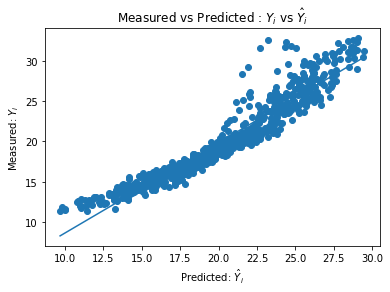

In [14]:
%matplotlib inline

fig, ax = plt.subplots(1)

measured = test_labels9
predicted = predicted9
measured = measured.ravel()
predicted = predicted.ravel()

plt.scatter(predicted, measured)
plt.ylabel("Measured: $Y_i$")
plt.xlabel("Predicted: $\hat{Y}_i$")
plt.title("Measured vs Predicted : $Y_i$ vs $\hat{Y}_i$")

plt.plot(np.unique(predicted), np.poly1d(np.polyfit(predicted, measured, 1))(np.unique(predicted)))